The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


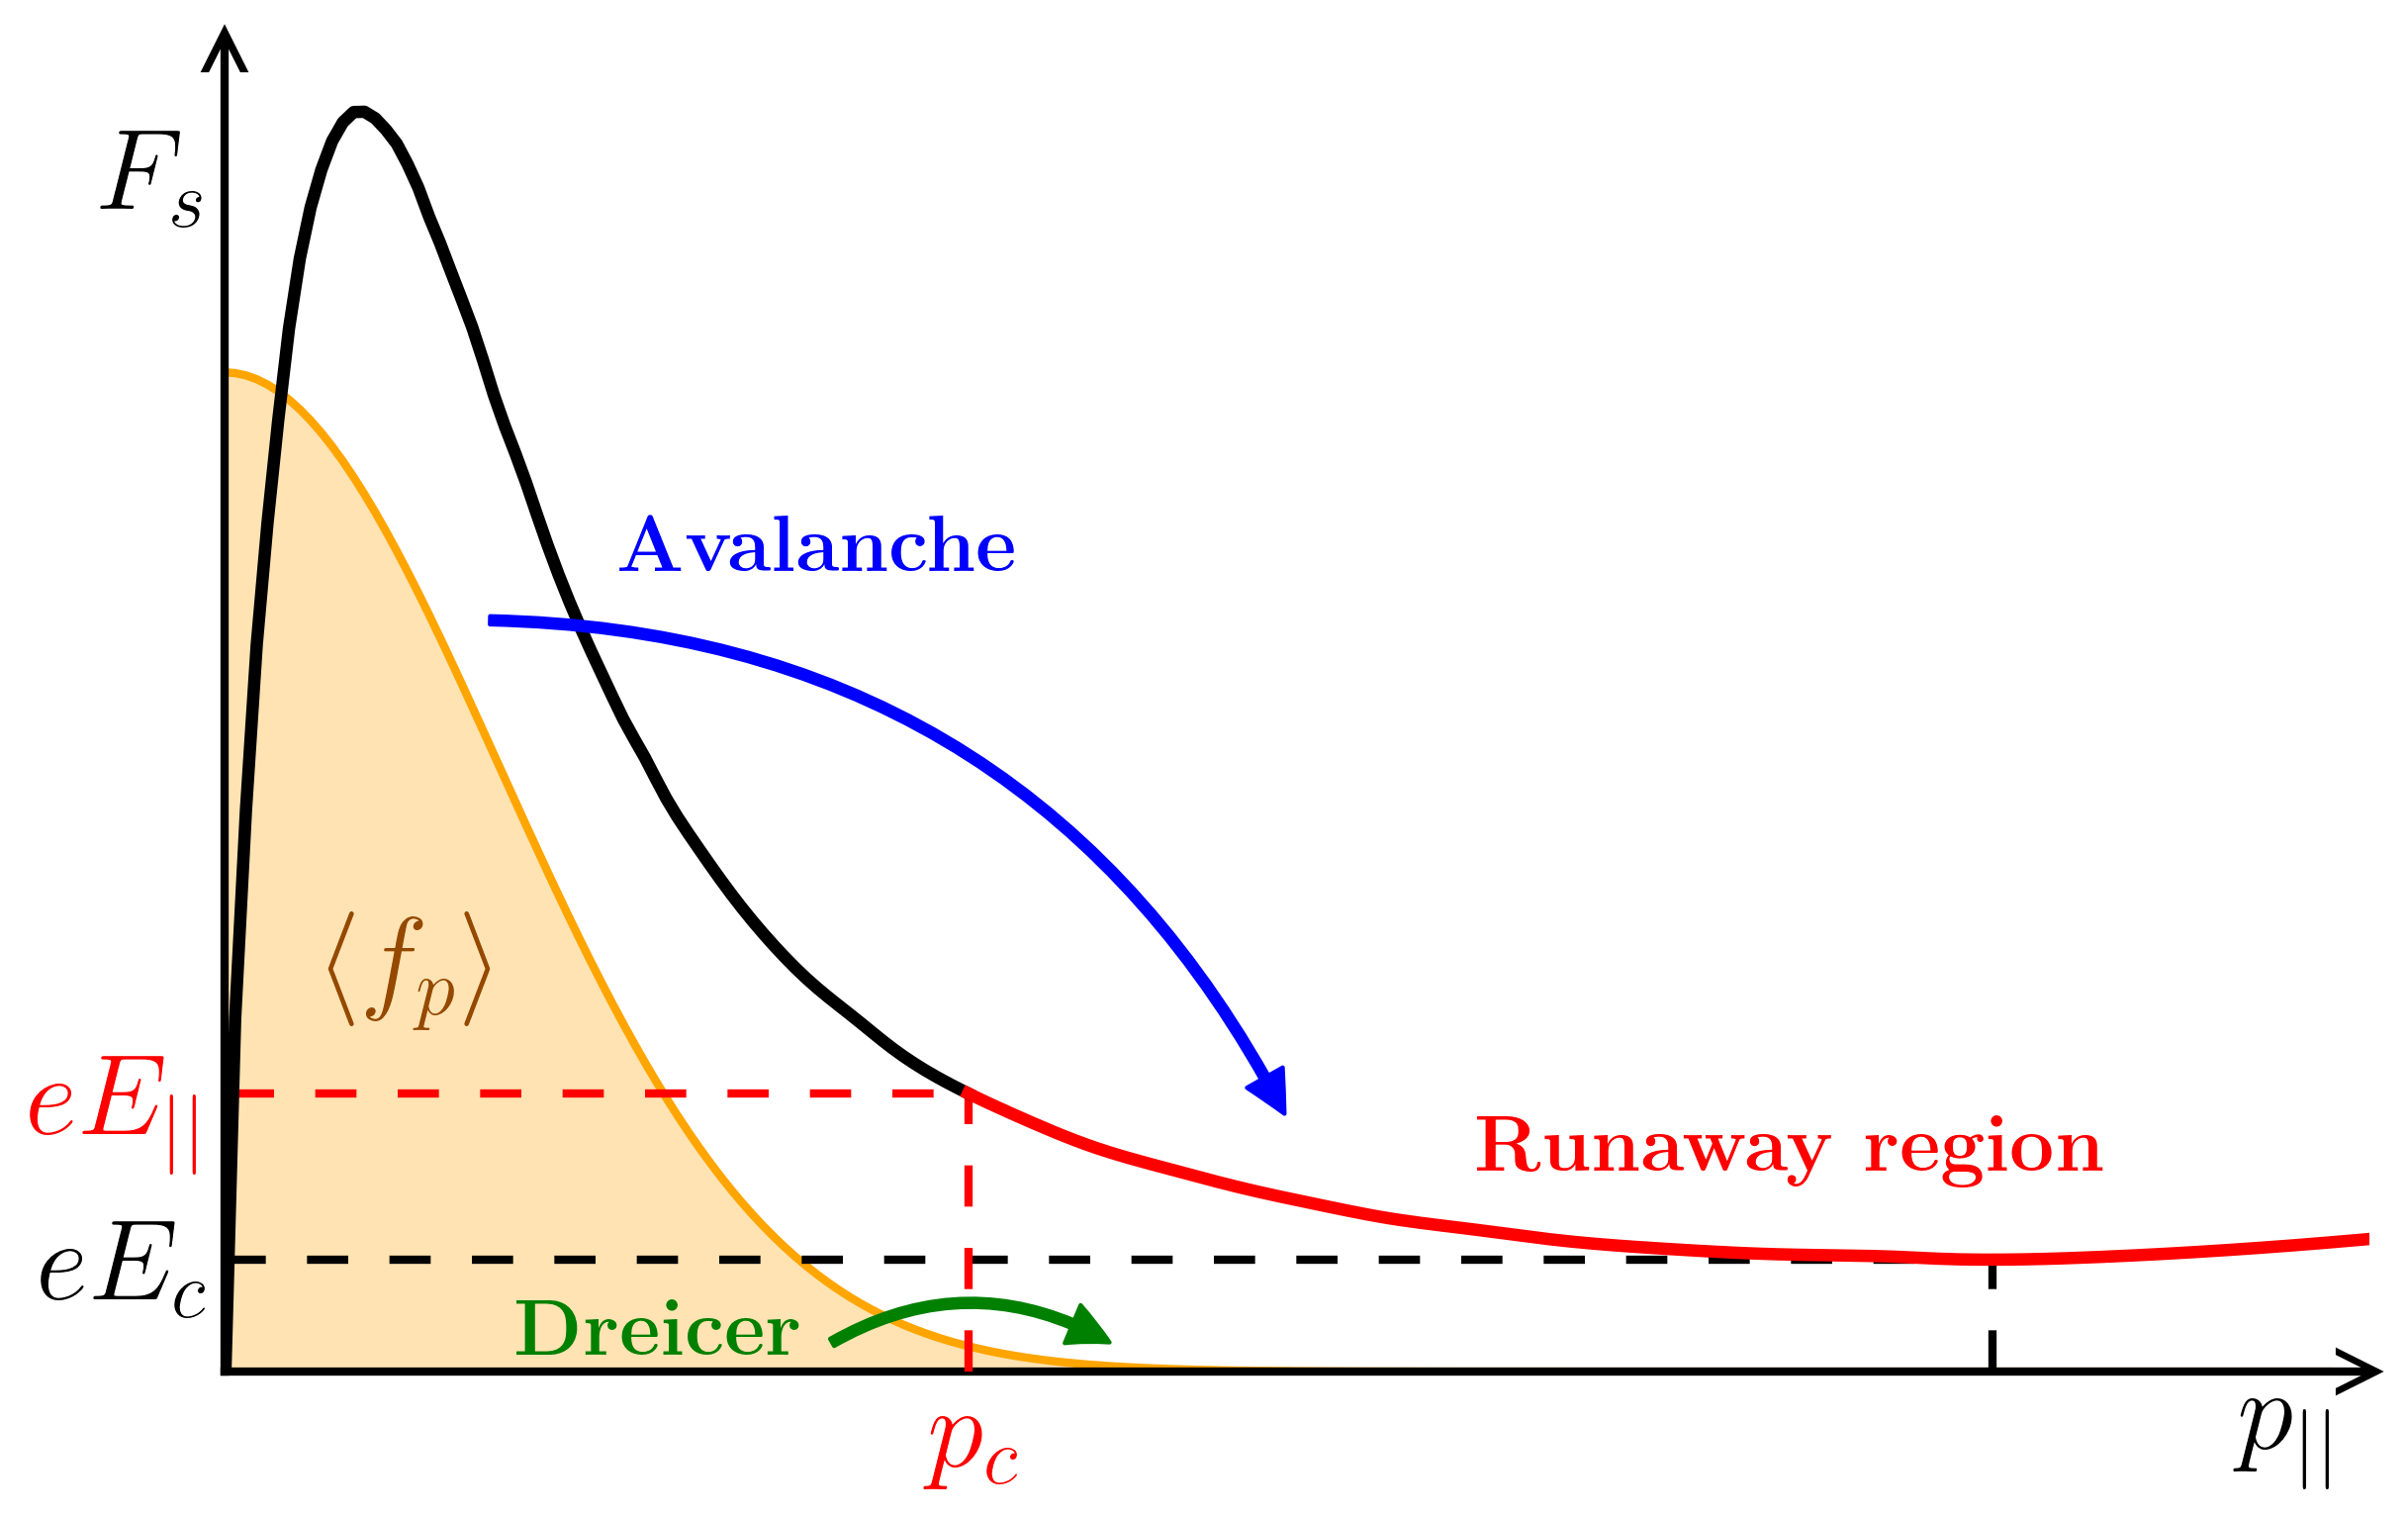

In [5]:
# Notebook for plotting the drag force acting on electrons


import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

latex = True
sansserif = False
language = "EN"  # HU or EN

if latex:
    plt.rcParams.update({"text.usetex": True, "text.latex.preamble" : r"\usepackage{amsmath} \usepackage{amssymb}"})
    if not sansserif:
        plt.rcParams.update({"font.family" : "serif",
                             "font.serif" : "STIXGeneral", 
                             "mathtext.fontset" : "stix"})
    else: 
        plt.rcParams.update({"font.family": "sans-serif",
                             "text.latex.preamble": r'\usepackage{cmbright}',
                             "mathtext.fontset" : "stixsans",
                             "font.size": 32})
else: plt.rcParams.update({"text.usetex": False})

plt.close('all')
plt.rcParams.update({"xtick.major.size" : 0,
                     "xtick.minor.visible" : False,
                     "xtick.top" : False,
                     "ytick.direction" : "in",
                     "ytick.labelsize" : "medium",
                     "ytick.major.size" : 0,
                     "ytick.minor.visible" : False,
                     "ytick.right" : False,
                     'font.size': 28, 
                     "figure.dpi" : 300,
                     'lines.linewidth': 3,
                     'figure.constrained_layout.use': True})

matplotlib.rcParams.update({'axes.linewidth': 2})

chandrasekar_og = np.genfromtxt("Chandrasekar.csv", delimiter=",")
length = len(chandrasekar_og[:, 0])
spl = scipy.interpolate.splrep(chandrasekar_og[:, 0], chandrasekar_og[:, 1])
chx = np.linspace(0, 125, 200)
chandrasekar = scipy.interpolate.splev(chx, spl)

border = 70
minloc = np.argmin(chandrasekar[border:]) + border

rv = scipy.stats.norm(loc=0, scale=16)
distr = 1600*rv.pdf(chx)

fig = plt.figure(figsize=[8, 5])
plt.plot(chx, distr, zorder=1, c="orange", linewidth=2)
plt.plot(chx[:border], chandrasekar[:border], c="k", zorder=5)
plt.plot(chx[border-1:], chandrasekar[border-1:], c="red", zorder=6)

axes = plt.gca()

d = np.zeros(len(chx))
axes.fill_between(chx, distr, where=distr>=d, interpolate=True, color='orange', alpha=0.3)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim([0, 53])
axes.set_xlim([0, 125])
axes.xaxis.set_tick_params(labelbottom=True)
axes.yaxis.set_tick_params(labelleft=True)
axes.set_xticks([chx[border-1], 120])
# axes.set_xticks([])
axes.set_xticklabels([r"$p_c$", r"$p_{\rm ||}$"])
axes.set_yticks([48, chandrasekar[border-1], chandrasekar[minloc]])
# axes.set_yticks([chandrasekar[border-1], chandrasekar[minloc]])
# axes.set_yticklabels([r"$\left|\mathbf{F}_s\right|$", r"$\left|e\mathbf{E}_{||}\right|$", r"$\left|e\mathbf{E}_c\right|$"])
axes.set_yticklabels([r"$F_s$", r"$eE_{||}$", r"$eE_c$"])
# axes.set_yticklabels([r"$eE_{||}$", r"$eE_c$"])

[t.set_color(i) for (i,t) in zip(['red','k'], axes.xaxis.get_ticklabels())]
[t.set_color(i) for (i,t) in zip(['k', 'red','k'], axes.yaxis.get_ticklabels())]

axes.axvline(chx[border-1], ymax=chandrasekar[border-1]/53, c="red", ls=(0, (5, 5)), linewidth=2, zorder=3)
axes.axhline(chandrasekar[border-1], xmax=chx[border-1]/125, c="red", ls=(-1, (5, 5)), linewidth=2, zorder=3)

axes.axvline(chx[minloc], ymax=chandrasekar[minloc]/53, c="k", ls=(0, (5, 5)), linewidth=2, zorder=2)
axes.axhline(chandrasekar[minloc], xmax=chx[minloc]/125, c="k", ls=(0, (5, 5)), linewidth=2, zorder=2)

axes.plot(0.995, 0, ">k", transform=axes.get_yaxis_transform(), clip_on=False, ms=10)
axes.plot(0.991, 0, ">w", transform=axes.get_yaxis_transform(), clip_on=False, ms=7)

axes.plot(0, 0.996, "^k", transform=axes.get_xaxis_transform(), clip_on=False, ms=10)
axes.plot(0, 0.988, "^w", transform=axes.get_xaxis_transform(), clip_on=False, ms=7)

style = "Simple, tail_width=2, head_width=10, head_length=10"
kw1 = dict(arrowstyle=style, color="green")
a1 = patches.FancyArrowPatch((35, 1), (52, 1), connectionstyle="arc3,rad=-.3", **kw1, zorder=10)
axes.add_patch(a1)

kw2 = dict(arrowstyle=style, color="blue")
a2 = patches.FancyArrowPatch((15, 30), (62, 10), connectionstyle="arc3,rad=-.3", **kw2, zorder=10)
axes.add_patch(a2)


axes.annotate(xy=(8, 20), xytext=(6, 15), text=r"$\langle f_p\rangle$", c="#954900")

axes.annotate(xy=(0, 0), xytext=(17, 0.7), text=r"\textbf{Dreicer}", c="green", fontsize="x-small")
if language == "HU":
    axes.annotate(xy=(0, 0), xytext=(23, 32), text=r"\textbf{Lavina}", c="blue", fontsize="x-small")
    axes.annotate(xy=(0, 0), xytext=(73, 8), text=r"\textbf{Elfutó tartomány}", c="red", fontsize="x-small")
elif language == "EN":
    axes.annotate(xy=(0, 0), xytext=(23, 32), text=r"\textbf{Avalanche}", c="blue", fontsize="x-small")
    axes.annotate(xy=(0, 0), xytext=(73, 8), text=r"\textbf{Runaway region}", c="red", fontsize="x-small")


plt.savefig("Chandrasekar2_EN.eps", format="eps")